<a href="https://colab.research.google.com/github/TobiasSunderdiek/cartoon-gan/blob/master/CartoonGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN

This notebook contains the implementation of the cartoon GAN model. It is implemented with PyTorch. See README [here](https://github.com/TobiasSunderdiek/cartoon-gan/blob/master/README.md) for more details.

## Generate dataset

## Transfer data via google drive
- all image data in this notebook is expected to be zipped to files on local computer as described in README of this project [here](https://github.com/TobiasSunderdiek/cartoon-gan/blob/master/README.md)
- create folder `cartoonGAN` in `My Drive` in google drive
- copy .zip-files `coco.zip`, `safebooru.zip` and `safebooru_smoothed.zip` to google drive `My Drive`/`cartoonGAN`
- mount google drive in this notebook by executing cell below

In [1]:
from google.colab import drive
drive.mount('/content/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/data


### cartoons images

- cartoon images are located in file `content/data/My Drive/cartoonGAN/safebooru.zip` of this notebook
- extract images and place in folder `cartoons` by executing cell below

In [2]:
!mkdir cartoons
!mkdir cartoons/1
!unzip /content/data/My\ Drive/cartoonGAN/safebooru.zip -d cartoons/1/ #extract to subfolder due to DataLoader needs subdirectories

Archive:  /content/data/My Drive/cartoonGAN/safebooru.zip
  inflating: cartoons/1/sample_bef5424f68e9a2b57960f5098cf7b11c2db60c09.jpg  
  inflating: cartoons/1/sample_909eed31bbc9066eb46f5f38c2c8fff712758752.jpg  
  inflating: cartoons/1/sample_137521e3cffd098f53d952e6cc069af9a11c1845.jpg  
  inflating: cartoons/1/sample_24355b1d263da235bb119baf0360f455001cdf78.jpg  
  inflating: cartoons/1/sample_3370f52df36a94223248f3be53aea8527126db34.jpg  
  inflating: cartoons/1/sample_bd6a13be2493368542c7264ba20b85ffeaabc5c7.jpg  
  inflating: cartoons/1/sample_90e7e20d5c13bd39096e481f35c0508b7aa392e9.jpg  
  inflating: cartoons/1/b244ab04c37d927f77935e7ffa6f2316849a7340.jpg  
  inflating: cartoons/1/73fdab9ee3229039a5bd3c3cb8cc0cc9024cf0b6.jpg  
  inflating: cartoons/1/sample_d9a6995e9ac6db3dda16e84e67e9bbf7d5c67995.jpg  
  inflating: cartoons/1/sample_6189152a3896b83e0a0593db4d68c164cb4b524c.jpg  
  inflating: cartoons/1/83e9b924aca0772da55ca6895b101b699fd126fa.jpg  
  inflating: cartoons/1/sam

##### data-loader

As mentioned in the paper, the used image size is 256x256 pixel.

In [0]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms

image_size = 256
batch_size = 25

transformer = transforms.Compose([
    transforms.CenterCrop(image_size),
    transforms.ToTensor()
])

cartoon_image_dataloader = DataLoader(ImageFolder('cartoons/', transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])
Current range: 0.0 to 1.0


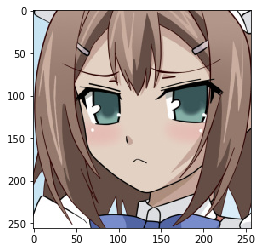

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_image(dataloader):
  iterator = iter(dataloader)
  sample_batch, _ = iterator.next()
  first_sample_image_of_batch = sample_batch[0]
  print(first_sample_image_of_batch.size())
  print("Current range: {} to {}".format(first_sample_image_of_batch.min(), first_sample_image_of_batch.max()))
  plt.imshow(np.transpose(first_sample_image_of_batch.numpy(), (1, 2, 0)))

show_sample_image(cartoon_image_dataloader)

### edge-smoothed cartoons images

- edge-smoothed cartoon images are located in file `content/data/My Drive/cartoonGAN/safebooru_smoothed.zip` of this notebook
- extract images and place in folder `cartoons_smoothed` by executing cell below

In [13]:
!mkdir cartoons_smoothed
!mkdir cartoons_smoothed/1
!unzip /content/data/My\ Drive/cartoonGAN/safebooru_smoothed.zip -d cartoons_smoothed/1/ #extract to subfolder due to DataLoader needs subdirectories

Archive:  /content/data/My Drive/cartoonGAN/safebooru_smoothed.zip
  inflating: cartoons_smoothed/1/sample_bef5424f68e9a2b57960f5098cf7b11c2db60c09.jpg  
  inflating: cartoons_smoothed/1/sample_909eed31bbc9066eb46f5f38c2c8fff712758752.jpg  
  inflating: cartoons_smoothed/1/sample_137521e3cffd098f53d952e6cc069af9a11c1845.jpg  
  inflating: cartoons_smoothed/1/sample_24355b1d263da235bb119baf0360f455001cdf78.jpg  
  inflating: cartoons_smoothed/1/sample_3370f52df36a94223248f3be53aea8527126db34.jpg  
  inflating: cartoons_smoothed/1/sample_bd6a13be2493368542c7264ba20b85ffeaabc5c7.jpg  
  inflating: cartoons_smoothed/1/sample_90e7e20d5c13bd39096e481f35c0508b7aa392e9.jpg  
  inflating: cartoons_smoothed/1/b244ab04c37d927f77935e7ffa6f2316849a7340.jpg  
  inflating: cartoons_smoothed/1/73fdab9ee3229039a5bd3c3cb8cc0cc9024cf0b6.jpg  
  inflating: cartoons_smoothed/1/sample_d9a6995e9ac6db3dda16e84e67e9bbf7d5c67995.jpg  
  inflating: cartoons_smoothed/1/sample_6189152a3896b83e0a0593db4d68c164cb4b5

##### data-loader

same configuration as cartoon data loader above

In [0]:
smoothed_cartoon_image_dataloader = DataLoader(ImageFolder('cartoons_smoothed/', transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])
Current range: 0.019607843831181526 to 1.0


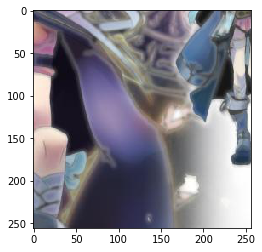

In [19]:
show_sample_image(smoothed_cartoon_image_dataloader)

### photos

- photos are located in file `content/data/My Drive/cartoonGAN/coco.zip` of this notebook
- extract images and place in folder `photos` by executing cell below

In [10]:
!mkdir photos
!mkdir photos/1
!unzip /content/data/My\ Drive/cartoonGAN/coco.zip -d photos/1 #extract to subfolder due to DataLoader needs subdirectories

Archive:  /content/data/My Drive/cartoonGAN/coco.zip
  inflating: photos/1/000000182611.jpg  
  inflating: photos/1/000000278705.jpg  
  inflating: photos/1/000000568981.jpg  
  inflating: photos/1/000000092416.jpg  
  inflating: photos/1/000000173830.jpg  
  inflating: photos/1/000000476215.jpg  
  inflating: photos/1/000000479126.jpg  
  inflating: photos/1/000000231339.jpg  
  inflating: photos/1/000000011051.jpg  
  inflating: photos/1/000000124798.jpg  
  inflating: photos/1/000000272566.jpg  
  inflating: photos/1/000000289059.jpg  
  inflating: photos/1/000000559547.jpg  
  inflating: photos/1/000000295316.jpg  
  inflating: photos/1/000000377393.jpg  
  inflating: photos/1/000000032887.jpg  
  inflating: photos/1/000000111086.jpg  
  inflating: photos/1/000000364884.jpg  
  inflating: photos/1/000000101068.jpg  
  inflating: photos/1/000000361730.jpg  
  inflating: photos/1/000000434230.jpg  
  inflating: photos/1/000000304180.jpg  
  inflating: photos/1/000000567640.jpg  
  in

##### data-loader
same configuration as cartoon data loader above

In [0]:
photo_dataloader = DataLoader(ImageFolder('photos/', transformer), batch_size, shuffle=True, num_workers=0)

#### show examples

torch.Size([3, 256, 256])
Current range: 0.0 to 1.0


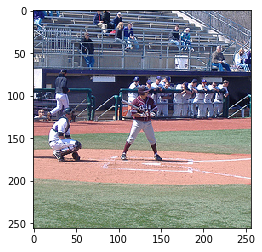

In [12]:
show_sample_image(photo_dataloader)

##Define model

###Generator

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
  def __init__(self):
    super(ResidualBlock, self).__init__()
    self.conv_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1)
    self.conv_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1)
    self.norm_1 = nn.BatchNorm2d(256)
    self.norm_2 = nn.BatchNorm2d(256)

  def forward(self, x):
    output = norm_2(conv_2(F.relu(norm_1(conv_1(x)))))

    return output + x #ES

class Generator(nn.Module):
    def __init__(self):
      super(Generator, self).__init__()
      self.conv_1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=1)
      self.norm_1 = nn.BatchNorm2d(64)
      
      # down-convolution #
      self.conv_2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2)
      self.conv_3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1)
      self.norm_2 = nn.BatchNorm2d(128)
      
      self.conv_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2)
      self.conv_5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1)
      self.norm_3 = nn.BatchNorm2d(256)
      
      # residual blocks #
      residualBlocks = []
      for l in range(8):
        residualBlocks.append(ResidualBlock())
      self.res = nn.Sequential(*residualBlocks)
      
      # up-convolution #
      self.conv_6 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=0.5)
      self.conv_7 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1)
      self.norm_4 = nn.BatchNorm2d(128)

      self.conv_8 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=0.5)
      self.conv_9 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
      self.norm_5 = nn.BatchNorm2d(64)
      
      self.conv_10 = nn.Conv2d(in_channels=64, out_channels=3, kernel_size=7, stride=1)

    def forward(self, x):
      x = F.relu(self.norm_1(self.conv_1(x)))
      
      x = F.relu(self.norm_2(self.conv_3(self.conv_2(x))))
      x = F.relu(self.norm_3(self.conv_5(self.conv_4(x))))
      
      x = self.res(x)
      
      x = F.relu(self.norm_4(self.conv_7(self.conv_6(x))))
      x = F.relu(self.norm_5(self.conv_9(self.conv_8(x))))
      
      x = self.conv_10(x)

      return x

In [0]:
G = Generator()
print(G)

Generator(
  (conv_1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
  (norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (conv_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (norm_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (conv_5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (norm_3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (res): Sequential(
    (0): ResidualBlock(
      (conv_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
      (conv_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
      (norm_1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (norm_2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Resid

### Discriminator

In [0]:
class Discriminator(nn.Module):
  def __init__(self):
     super(Discriminator, self).__init__()
     self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1)
      
     self.conv_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
     self.conv_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1)
     self.norm_1 = nn.BatchNorm2d(128)
      
     self.conv_4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2)
     self.conv_5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1)
     self.norm_2 = nn.BatchNorm2d(256)
    
     self.conv_6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1)
     self.norm_3 = nn.BatchNorm2d(256)
    
     self.conv_7 = nn.Conv2d(in_channels=256, out_channels=1, kernel_size=3, stride=1)

  def forward(x):
    x = F.leaky_relu(self.conv_1(x))
    
    x = F.leaky_relu(self.norm_1(self.conv_3(F.leaky_relu(self.conv_2(x)))), negative_slope=0.2)
    
    x = F.leaky_relu(self.norm_2(self.conv_5(F.leaky_relu(self.conv_4(x)))), negative_slope=0.2)
    
    x = F.leaky_relu(self.norm_3(self.conv_6(x)), negative_slope=0.2)
    
    x = self.conv_7(x)
    
    return x

In [0]:
D = Discriminator()
print(D)

Discriminator(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (norm_1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (norm_2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (norm_3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_7): Conv2d(256, 1, kernel_size=(3, 3), stride=(1, 1))
)


### move to GPU

In [0]:
import torch

if torch.cuda.is_available():
  G.cuda()
  D.cuda()
  print("Train on GPU. Models moved.")
else:
  print("No cuda available")

No cuda available


## Loss function
$\mathcal{L}(G, D) = \mathcal{L}_{adv}(G, D) + ω\mathcal{L}_{con}(G, D)$ with ω = 10

### Generator loss

The adversarial loss  $\mathcal{L}_{adv}(G, D)$ which drives the generator to transform photo to comic style of the image. Its value indicates if the output looks like a cartoon image or not. The paper highlights, that a characteristic part of cartoons images are the clear edges, which are a small detail of the image, must be preserved to generate clear edges in the result. In the paper, this is solved by training not only with cartoon images but additionaly by training with the same cartoon images with smoothed edges so that the discriminator can distinguish between clear and smooth edges. For achieving this the authors define the edge-promoting adversarial loss function:

$\mathcal{L}_{adv}(G, D) = \mathbb{E}_{ci∼S_{data}(c)}[log D(c_i)]
+ \mathbb{E}_{ej∼S_{data}(e)}[log(1 − D(e_j))]
+ \mathbb{E}_{pk∼S_{data}(p)}[log(1 − D(G(p_k)))]$

### Content loss
The content loss $ω\mathcal{L}_{con}(G, D)$ which preserves the image content during transformation.